# US Accidents Exploratory Data Analysis(2019-2021)


I download the dataset from kaggle (2016-2023). you can checkout the dataset from this  [adress](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents)

Import the necessary library


In [1]:
import pandas as pd

In [ ]:
#import the dataset from the csv file we have already download it 
file_name = './US_Accidents_March23.csv'
# Specify the chunk size (adjust according to your system's memory capacity)
chunk_size = 100000

# Initialize an empty list to store the chunks
chunks = []

# Read the CSV file in chunks and append them to the list
for chunk in pd.read_csv(file_name,chunksize=chunk_size):
    chunks.append(chunk)

# Concatenate all the chunks into a single DataFrame
df = pd.concat(chunks)

# Perform further data processing or analysis on the DataFrame
# ...

# Print the summary or subset of the data
print(df.head())

# Data Preparation and Cleaning

get to know the datatypes for each column

In [ ]:
df.dtypes

our task right now is  : to split the data from 2019 to 2021 (we don't need the whole data sets)
first remark : the start_time type is an object ... we have to convert it to datatime 

In [ ]:
# the dayfirst parameter if the date values have the day listed before the month.
# the errors parameter to handle the unconvertible data. Setting it to 'coerce' will replace unconvertible values with NaT (Not a Time) in the resulting datetime column.
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S', dayfirst=True, errors='coerce')

df.dtypes

Now : we split the dataset from 2019 to 2021

In [5]:
# Specify the start and end dates as strings
start_date_str = '2019-10-01'
end_date_str = '2021-02-01'

# Convert the start and end dates to datetime type
start_date = pd.to_datetime(start_date_str)
end_date = pd.to_datetime(end_date_str)

# Filter the DataFrame based on the date range
filtered_df = df[(df['Start_Time'] >= start_date) & (df['Start_Time'] <= end_date)]
#we sort our dataset from 2019 to 2021
filtered_df = filtered_df.sort_values(['Start_Time'],ascending=True)

Let's display our filtred dataframe (from 2019-10-01 to 2021-02-01 )

In [ ]:
#pd.set_option('display.max_rows', None) --> if you want to display all rows (it might take some times )
filtered_df

get to knom more info about the dataframe


In [ ]:
filtered_df.info()

In [8]:
filtered_df.describe()

,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.588648e+06,1588648,1.588648e+06,1.588648e+06,897502.000000,897502.000000,1.588648e+06,1.549011e+06,1.537160e+06,1.545928e+06,1.555808e+06,1.549634e+06,1.542866e+06,1.503949e+06
mean,2.191419e+00,2020-06-23 23:21:32.052712192,3.630043e+01,-9.619971e+01,36.495055,-99.004153,4.172460e-01,5.764224e+01,5.624907e+01,6.625812e+01,2.934238e+01,8.960522e+00,6.994106e+00,5.720340e-03
min,1.000000e+00,2019-10-01 00:03:00,2.456309e+01,-1.244975e+02,24.574326,-124.497470,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,1.671000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2020-02-06 19:44:42,3.356029e+01,-1.177303e+02,33.778650,-118.251129,0.000000e+00,4.500000e+01,4.300000e+01,5.000000e+01,2.915000e+01,1.000000e+01,3.000000e+00,0.000000e+00
50%,2.000000e+00,2020-06-20 10:25:14,3.580046e+01,-9.067726e+01,36.374963,-94.578747,0.000000e+00,5.800000e+01,5.800000e+01,7.000000e+01,2.965000e+01,1.000000e+01,6.000000e+00,0.000000e+00
75%,2.000000e+00,2020-11-15 04:08:36.750000128,3.999903e+01,-8.078100e+01,40.123140,-80.665052,1.910000e-01,7.100000e+01,7.100000e+01,8.600000e+01,2.995000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,2021-02-01 00:00:00,4.900220e+01,-6.748413e+01,48.999280,-67.484130,4.417500e+02,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.300000e+02,9.840000e+02,2.400000e+01
std,4.897848e-01,NaN,4.995273e+00,1.771645e+01,5.157399,18.607937,1.712555e+00,1.781720e+01,1.986041e+01,2.323524e+01,1.086641e+00,2.712611e+00,5.599980e+00,5.302428e-02


let's see the percentage of the missing values in each column 

<Axes: title={'center': 'the percentage of missing values in our dataset'}>

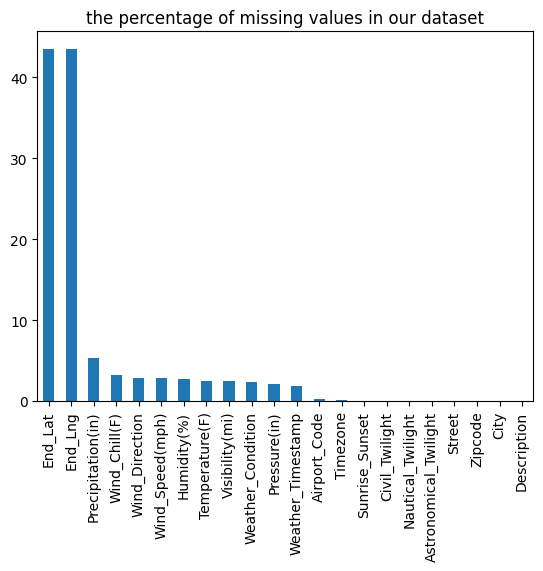

In [9]:

#calcul the percentage of missing values in our datasets
per_missing_values =(filtered_df.isna().sum()) / (len(filtered_df))*100
#lets remove the columns that has 0% (we don't need them in our bar chart)
per_missing_values = per_missing_values[per_missing_values > 0 ]
#sort the dataframe
per_missing_values = per_missing_values.sort_values(ascending=False)
per_missing_values.plot(kind='bar',title='the percentage of missing values in our dataset')

# Exploratory Analysis and Visualization

Columns we'll analyze:

### City

let's first take a quick review about the cities exist in the database  .  and the cities that has the most case of accidents 


In [10]:
filtered_df.columns # to see how the city column look like 

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
unique_city = filtered_df.City.unique()
print('there is {} cities in our dataset'.format(len(unique_city)))
percentage_of_exist_city = (len(unique_city) / 108000) * 100
print('The dataset contains {:.2f}% cities between cities contained by the entire United States  '.format(percentage_of_exist_city))

there is 10222 cities in our dataset
The dataset contains 9.46% cities between cities contained by the entire United States  


### let's plot the cities where the most accidents occured ,We take just the TOP 15 cities

<Axes: title={'center': 'Cities where the most accidents occurred (2019-2021) US'}, xlabel='Number of accidents', ylabel='City'>

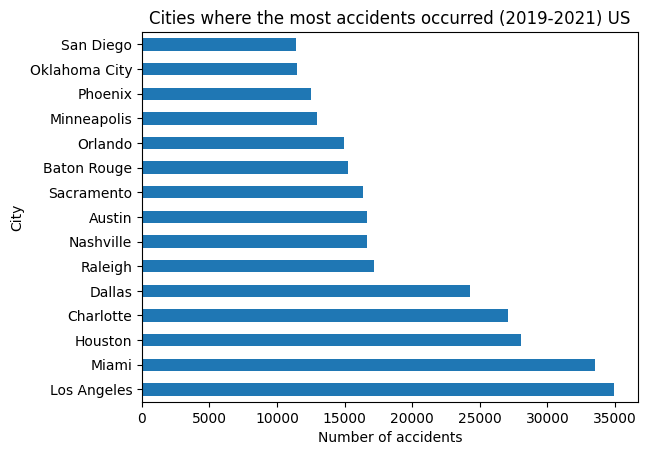

In [12]:
accident_city  = filtered_df.City.value_counts()
accident_city[:15].plot(kind='barh',xlabel='Number of accidents',title='Cities where the most accidents occurred (2019-2021) US')

In [13]:
accident_city[accident_city == 1]
#can you imagine that there is 1260 city that  reported just 1 ACCIDENT ? 

City
Bardonia            1
Mexico Beach        1
Middle Granville    1
Mendenhall          1
Pryor               1
                   ..
East Thetford       1
Doon                1
Fruitport           1
Muscadine           1
Solomons            1
Name: count, Length: 1260, dtype: int64

let's display the severty of accidents occur in los angeles for each months .

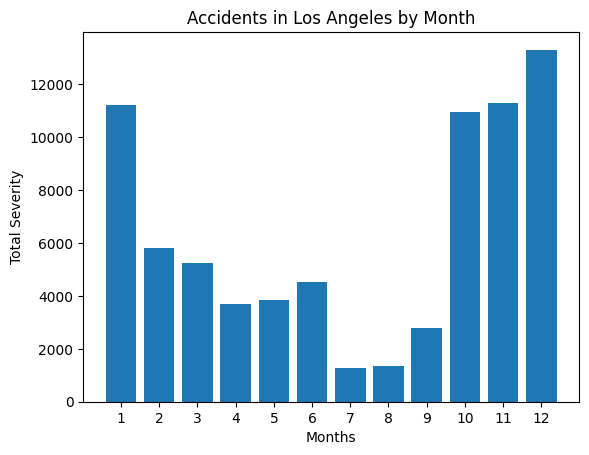

In [14]:
import matplotlib.pyplot as plt

# Get the accidents that took place in Los Angeles
los_ang_accidents = filtered_df[filtered_df.City == 'Los Angeles']

# Group the data by months and calculate the total severity number
grouped_los_ang_accidents = los_ang_accidents.groupby(los_ang_accidents['Start_Time'].dt.month).agg({'Severity':'sum'})

# Convert the index column (months) to a list
months = grouped_los_ang_accidents.index.tolist()

# Get the severity values as a separate array
severity_values = grouped_los_ang_accidents['Severity']

# Plot the bar chart
plt.bar(months, severity_values)
plt.xlabel('Months')
plt.ylabel('Total Severity')
plt.xticks(months)
plt.title('Accidents in Los Angeles by Month')
plt.show()


the first note that you can observe is the increasing of the severty of accidents in (January,Octobre,novembre,December) 

its enough about the city column , let's move to another column .

the column we'll analyze : 
### Time Zone

In [15]:
# get the values that the 'timezone' column contain
filtered_df.Timezone.value_counts()

Timezone
US/Eastern     670899
US/Pacific     479402
US/Central     342343
US/Mountain     94127
Name: count, dtype: int64

as we can see there is 4 diffrent values for this column 
let's visualize this values with a pie chart 

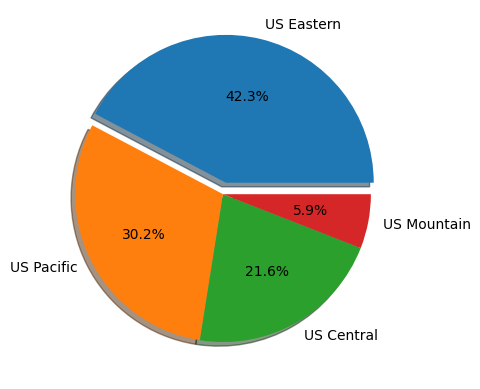

In [16]:
Eastern = len(filtered_df[filtered_df.Timezone == 'US/Eastern'])
Pacific = len(filtered_df[filtered_df.Timezone == 'US/Pacific'])
Central = len(filtered_df[filtered_df.Timezone == 'US/Central'])
Mountain = len(filtered_df[filtered_df.Timezone == 'US/Mountain'])
values=[Eastern,Pacific,Central,Mountain]
labels=['US Eastern','US Pacific','US Central','US Mountain']
plt.pie(values,labels=labels,autopct='%1.1f%%',explode=(0.08,0,0,0),shadow=True)
plt.show()

### as we can see above : -the pie chart shows that the accidents occur more in the eastern of united state 

### This is similar to where the most economical cities are in the United States of America.

let's take another column 


the column we gonna analyze is :  
### Start_Time

let's see when the Severity accidents occur more among the hours of the day 
 

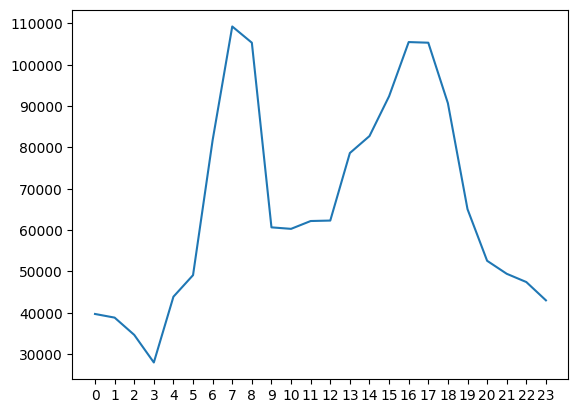

In [17]:
filtered_df_hours = filtered_df.groupby(filtered_df['Start_Time'].dt.hour).count()
filtered_df_hours_Severity =filtered_df_hours['Severity']
hours = filtered_df_hours_Severity.index.to_list()
plt.plot(filtered_df_hours_Severity)
plt.xticks(hours)
plt.show()

We can obviously see that the peak of the severity accidents occur when people go to the work and when they go out from the work (06:00-08:00) & (15:00-18:00)


the column we gonna analyze is :  
### Start_Lat & Start_Lng

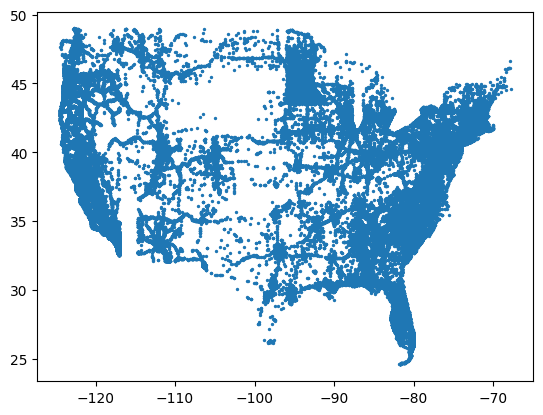

In [26]:
#let's take just 50 % of our dataframe 
filtered_df_sample = filtered_df.sample(int(0.5 * len(filtered_df)))
plt.scatter(filtered_df_sample['Start_Lng'],filtered_df_sample['Start_Lat'],s=2)  

### you can see above that the accidents distributed throughout USA , exactly in the eastern and the western of America 

# Compare the number of accidents before 2 months of the begining of COVID-19 and after that

after a quich research : the begining of quarantine in march 2020 - we begin our analysis from january 2020

<Axes: xlabel='Start_Time'>

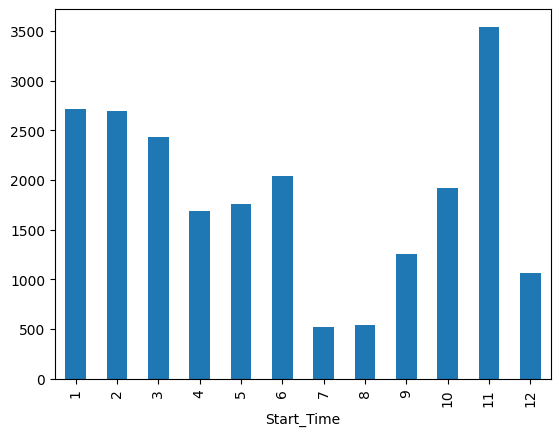

In [19]:
# Specify the start and end dates as strings
start_date_str = '2020-01-01'
end_date_str = '2020-12-12'

# Convert the start and end dates to datetime type
start_date = pd.to_datetime(start_date_str)
end_date = pd.to_datetime(end_date_str)

# Filter the DataFrame based on the date range
filtered_df_Covid = filtered_df[(filtered_df['Start_Time'] >= start_date) & (filtered_df['Start_Time'] <= end_date) & (filtered_df.City =='Los Angeles')]
#we sort our dataset from 2019 to 2021
filtered_df_Covid = filtered_df_Covid.sort_values(['Start_Time'],ascending=True)
#we group our dataframe by month to see each month with the severty of tha accidents 
filtered_df_Covid['accident'] = 1
filtered_df_Covid = filtered_df_Covid.groupby(filtered_df_Covid['Start_Time'].dt.month)['accident'].sum()
filtered_df_Covid.plot(kind='bar')

as we can see in the chart above : after the begin of the pandamic in march the number of accidents decrease slightly . and then decrease tremoundsly  in july and august . 

but the questions here is : 
1. why the number of accidents increase tremondously after the ending of the pandamic ?(at september-october-november)

### 2.Can the coronavirus affect drivers psychologically and physically?

# Ask & Answer Questions 

### Insights : 
1. the abesence of New York city among the cities exist in the dataset
2. in this period , los angales was the most city where accidents occurs
3. there is 1260 city that declare just 1  accident in this whole periode.
4. after a quich research : I found that there is 108,000 city in US,and the dataset contain just 10222  city(9.46%).which means there is a few cities where accident occurs 
5. question is : Do other cities really not have any accidents there?
Or those cities do not declare accidents occurring in their area
6. the Severity of accidents in Los Angales increase in the winter 
7. the accidents occur more in the eastern of america 
8. accidents occur more when people go and go out from the work 
### insights during the period of corona virus : 
1. The number of accidents decreases slightly immediately after the start of the pandemic. 
2. There was a sharp decline in the number of accidents in (July-August)
The reason needs to be clarified.
3. why the number of accidents increase tremendously after the ending of the quarantine ?
4. This may come down to drivers going through panic and fear due to the pandemic.